In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

import seaborn as sns
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display


from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

from sklearn.cluster import DBSCAN

In [3]:
plt.rcParams['figure.figsize'] = [6,4]
plt.rcParams['figure.dpi'] = 200
plt.rcParams["axes.grid"] = False

In [4]:
%store -r Australia_2019

In [5]:
Australia_2019

,Unnamed: 0_x,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
35,35,JP Behrendorff (AUS),11,5,3,19,11*,9.50,15,126.66,...,517,16,5/44,32.31,5.24,36.9,0,1,3,0
52,52,AT Carey (AUS),23,20,6,605,85,43.21,621,97.42,...,-,-,-,-,-,-,-,-,29,5
66,66,NM Coulter-Nile (AUS),10,6,1,132,92,26.40,105,125.71,...,544,14,3/53,38.85,5.95,39.1,0,0,0,0
68,68,PJ Cummins (AUS),16,12,3,68,23*,7.55,82,82.92,...,670,31,5/70,21.61,4.73,27.3,1,1,7,0
103,103,AJ Finch (AUS),23,23,1,1141,153*,51.86,1276,89.42,...,102,2,1/13,51.00,5.66,54.0,0,0,13,0
121,121,PSP Handscomb (AUS),14,13,1,483,117,40.25,500,96.60,...,-,-,-,-,-,-,-,-,8,0
164,164,UT Khawaja (AUS),22,22,0,1085,104,49.31,1278,84.89,...,-,-,-,-,-,-,-,-,10,0
185,185,NM Lyon (AUS),14,6,5,27,12*,27.00,24,112.50,...,672,11,2/53,61.09,5.01,73.0,0,0,4,0
195,195,SE Marsh (AUS),13,13,2,461,131,41.90,556,82.91,...,-,-,-,-,-,-,-,-,6,0
202,202,GJ Maxwell (AUS),23,22,3,635,98,33.42,480,132.29,...,681,5,1/16,136.20,5.67,144.0,0,0,15,0


In [6]:
Australia_2019=Australia_2019.reset_index()

In [7]:
Australia_2019

,index,Unnamed: 0_x,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,35,35,JP Behrendorff (AUS),11,5,3,19,11*,9.50,15,...,517,16,5/44,32.31,5.24,36.9,0,1,3,0
1,52,52,AT Carey (AUS),23,20,6,605,85,43.21,621,...,-,-,-,-,-,-,-,-,29,5
2,66,66,NM Coulter-Nile (AUS),10,6,1,132,92,26.40,105,...,544,14,3/53,38.85,5.95,39.1,0,0,0,0
3,68,68,PJ Cummins (AUS),16,12,3,68,23*,7.55,82,...,670,31,5/70,21.61,4.73,27.3,1,1,7,0
4,103,103,AJ Finch (AUS),23,23,1,1141,153*,51.86,1276,...,102,2,1/13,51.00,5.66,54.0,0,0,13,0
5,121,121,PSP Handscomb (AUS),14,13,1,483,117,40.25,500,...,-,-,-,-,-,-,-,-,8,0
6,164,164,UT Khawaja (AUS),22,22,0,1085,104,49.31,1278,...,-,-,-,-,-,-,-,-,10,0
7,185,185,NM Lyon (AUS),14,6,5,27,12*,27.00,24,...,672,11,2/53,61.09,5.01,73.0,0,0,4,0
8,195,195,SE Marsh (AUS),13,13,2,461,131,41.90,556,...,-,-,-,-,-,-,-,-,6,0
9,202,202,GJ Maxwell (AUS),23,22,3,635,98,33.42,480,...,681,5,1/16,136.20,5.67,144.0,0,0,15,0


In [8]:
Australia_2019.drop(['index','Unnamed: 0_x'],inplace=True,axis=1)

In [9]:
Australia_2019

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,JP Behrendorff (AUS),11,5,3,19,11*,9.50,15,126.66,0,...,517,16,5/44,32.31,5.24,36.9,0,1,3,0
1,AT Carey (AUS),23,20,6,605,85,43.21,621,97.42,0,...,-,-,-,-,-,-,-,-,29,5
2,NM Coulter-Nile (AUS),10,6,1,132,92,26.40,105,125.71,0,...,544,14,3/53,38.85,5.95,39.1,0,0,0,0
3,PJ Cummins (AUS),16,12,3,68,23*,7.55,82,82.92,0,...,670,31,5/70,21.61,4.73,27.3,1,1,7,0
4,AJ Finch (AUS),23,23,1,1141,153*,51.86,1276,89.42,4,...,102,2,1/13,51.00,5.66,54.0,0,0,13,0
5,PSP Handscomb (AUS),14,13,1,483,117,40.25,500,96.60,1,...,-,-,-,-,-,-,-,-,8,0
6,UT Khawaja (AUS),22,22,0,1085,104,49.31,1278,84.89,2,...,-,-,-,-,-,-,-,-,10,0
7,NM Lyon (AUS),14,6,5,27,12*,27.00,24,112.50,0,...,672,11,2/53,61.09,5.01,73.0,0,0,4,0
8,SE Marsh (AUS),13,13,2,461,131,41.90,556,82.91,1,...,-,-,-,-,-,-,-,-,6,0
9,GJ Maxwell (AUS),23,22,3,635,98,33.42,480,132.29,0,...,681,5,1/16,136.20,5.67,144.0,0,0,15,0


In [10]:
Australia_2019_players =Australia_2019.copy()

In [11]:
Australia_2019_players.drop('Player',axis=1,inplace=True)

In [12]:
Australia_2019_players.HS=Australia_2019_players.HS.str.extract('(\d+)')
Australia_2019_players['HS'].fillna(value=0, inplace=True)


In [13]:
Australia_2019_players

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,11,5,3,19,11,9.50,15,126.66,0,0,...,517,16,5/44,32.31,5.24,36.9,0,1,3,0
1,23,20,6,605,85,43.21,621,97.42,0,4,...,-,-,-,-,-,-,-,-,29,5
2,10,6,1,132,92,26.40,105,125.71,0,1,...,544,14,3/53,38.85,5.95,39.1,0,0,0,0
3,16,12,3,68,23,7.55,82,82.92,0,0,...,670,31,5/70,21.61,4.73,27.3,1,1,7,0
4,23,23,1,1141,153,51.86,1276,89.42,4,6,...,102,2,1/13,51.00,5.66,54.0,0,0,13,0
5,14,13,1,483,117,40.25,500,96.60,1,3,...,-,-,-,-,-,-,-,-,8,0
6,22,22,0,1085,104,49.31,1278,84.89,2,8,...,-,-,-,-,-,-,-,-,10,0
7,14,6,5,27,12,27.00,24,112.50,0,0,...,672,11,2/53,61.09,5.01,73.0,0,0,4,0
8,13,13,2,461,131,41.90,556,82.91,1,3,...,-,-,-,-,-,-,-,-,6,0
9,23,22,3,635,98,33.42,480,132.29,0,3,...,681,5,1/16,136.20,5.67,144.0,0,0,15,0


In [14]:
Australia_2019_players.replace("-",0,inplace=True)

In [15]:
Australia_2019_players.drop('BBI',axis=1,inplace=True)

In [16]:
scaler = StandardScaler()

Australia_2019_players_scaled = pd.DataFrame(scaler.fit_transform(Australia_2019_players),columns=Australia_2019_players.columns)
Australia_2019_players_scaled.shape
Australia_2019_players_scaled.head()

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
0,-0.241637,-0.721657,0.738105,-0.844323,-1.034874,-0.911929,-0.823875,0.764849,-0.492428,-0.816994,...,1.510603,0.745335,0.758990,0.064537,0.456274,0.158107,-0.466252,1.568929,-0.465810,-0.229416
1,1.515721,1.380257,2.663597,0.833443,0.391209,0.719636,0.722086,-0.011537,-0.492428,0.949480,...,-0.715549,-1.021866,-0.871056,-0.905539,-1.479659,-0.902645,-0.466252,-0.392232,3.440984,4.358899
2,-0.388083,-0.581530,-0.545556,-0.520795,0.526109,-0.093969,-0.594277,0.739624,-0.492428,-0.375376,...,0.874560,0.837626,0.555234,0.260894,0.718586,0.221349,-0.466252,-0.392232,-0.916594,-0.229416
3,0.490596,0.259236,0.738105,-0.704032,-0.803617,-1.006309,-0.652952,-0.396543,-0.492428,-0.816994,...,2.782690,1.268317,2.287158,-0.256720,0.267853,-0.117861,1.398757,1.568929,0.135235,-0.229416
4,1.515721,1.800640,-0.545556,2.368055,1.701665,1.138296,2.393051,-0.223954,3.088864,1.832716,...,-0.715549,-0.673211,-0.667300,0.625686,0.611444,0.649675,-0.466252,-0.392232,1.036803,-0.229416


In [17]:
Australia_2019_players_scaled.describe()

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
count,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,...,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01
mean,-2.220446e-17,-2.775558e-17,-3.330669e-17,4.996004e-17,-6.661338e-17,1.887379e-16,5.551115e-18,-6.661338e-17,1.665335e-17,4.996004e-17,...,4.857226e-18,3.330669e-17,-6.661338e-17,-5.412337e-17,-2.720046e-16,2.220446e-17,-1.110223e-17,-1.665335e-17,3.885781e-17,4.163336e-17
std,1.025978e+00,1.025978e+00,1.025978e+00,1.025978e+00,1.025978e+00,1.025978e+00,1.025978e+00,1.025978e+00,1.025978e+00,1.025978e+00,...,1.025978e+00,1.025978e+00,1.025978e+00,1.025978e+00,1.025978e+00,1.025978e+00,1.025978e+00,1.025978e+00,1.025978e+00,1.025978e+00
min,-1.706101e+00,-1.282168e+00,-1.187387e+00,-8.987215e-01,-1.246860e+00,-1.371730e+00,-8.570389e-01,-2.598250e+00,-4.924276e-01,-8.169941e-01,...,-7.155488e-01,-1.021866e+00,-8.710556e-01,-9.055394e-01,-1.479659e+00,-9.026451e-01,-4.662524e-01,-3.922323e-01,-9.165940e-01,-2.294157e-01
25%,-4.613064e-01,-8.617850e-01,-5.455560e-01,-8.271444e-01,-1.020421e+00,-8.937794e-01,-8.041037e-01,-3.883786e-01,-4.924276e-01,-8.169941e-01,...,-7.155488e-01,-1.021866e+00,-8.710556e-01,-9.055394e-01,-1.479659e+00,-9.026451e-01,-4.662524e-01,-3.922323e-01,-5.033754e-01,-2.294157e-01
50%,-9.519021e-02,-1.611468e-01,-5.455560e-01,-5.308154e-01,6.359562e-02,-7.944867e-02,-6.185119e-01,-2.232905e-01,-4.924276e-01,-3.753756e-01,...,-3.975271e-01,-3.912112e-01,-5.144831e-01,-1.372248e-01,4.267180e-01,-1.509200e-01,-4.662524e-01,-3.922323e-01,-3.906794e-01,-2.294157e-01
75%,6.370422e-01,5.394914e-01,7.381051e-01,5.714712e-01,6.706447e-01,6.720830e-01,4.491195e-01,4.765584e-01,-2.685969e-01,5.078612e-01,...,1.590108e-01,9.410261e-01,6.825816e-01,3.020266e-01,6.631678e-01,2.465026e-01,-4.662524e-01,-3.922323e-01,2.854965e-01,-2.294157e-01
max,1.515721e+00,1.800640e+00,2.663597e+00,2.368055e+00,1.952193e+00,2.107265e+00,2.398153e+00,2.712185e+00,3.088864e+00,2.715953e+00,...,2.782690e+00,1.763954e+00,2.287158e+00,3.183732e+00,1.475964e+00,3.236874e+00,3.263767e+00,3.530090e+00,3.440984e+00,4.358899e+00


In [18]:
X =  Australia_2019_players_scaled.iloc[:,:].values

In [19]:
X

array([[-0.24163669, -0.72165737,  0.73810513, -0.84432292, -1.0348742 ,
        -0.9119294 , -0.8238747 ,  0.76484862, -0.49242763, -0.81699405,
         0.30151134, -0.85796564, -0.61663439, -1.60452201, -0.24163669,
         0.58284025,  0.81379477,  1.51060306,  0.74533508,  0.75898999,
         0.06453663,  0.45627423,  0.15810663, -0.4662524 ,  1.56892908,
        -0.46581005, -0.22941573],
       [ 1.51572106,  1.3802573 ,  2.66359676,  0.83344321,  0.39120943,
         0.71963603,  0.72208619, -0.01153692, -0.49242763,  0.94947957,
         0.30151134,  1.18340088, -0.26427188, -1.46574371,  1.51572106,
        -1.01997044, -1.00677933, -0.71554882, -1.02186618, -0.87105563,
        -0.90553938, -1.47965854, -0.90264513, -0.4662524 , -0.39223227,
         3.44098391,  4.35889894],
       [-0.38808317, -0.58152972, -0.54555596, -0.52079464,  0.52610923,
        -0.09396868, -0.59427655,  0.73962406, -0.49242763, -0.37537564,
        -0.90453403, -0.53253039, -0.14681771, -1.3514

In [20]:
"""from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)"""

'from sklearn.cross_validation import train_test_split\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)'

In [21]:
"""from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)"""

'from sklearn.preprocessing import StandardScaler\nsc_X = StandardScaler()\nX_train = sc_X.fit_transform(X_train)\nX_test = sc_X.transform(X_test)\nsc_y = StandardScaler()\ny_train = sc_y.fit_transform(y_train)'

In [22]:
np.any(np.isnan(Australia_2019_players_scaled))

False

In [23]:
Australia_2019_players_scaled

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
0,-0.241637,-0.721657,0.738105,-0.844323,-1.034874,-0.911929,-0.823875,0.764849,-0.492428,-0.816994,...,1.510603,0.745335,0.758990,0.064537,0.456274,0.158107,-0.466252,1.568929,-0.465810,-0.229416
1,1.515721,1.380257,2.663597,0.833443,0.391209,0.719636,0.722086,-0.011537,-0.492428,0.949480,...,-0.715549,-1.021866,-0.871056,-0.905539,-1.479659,-0.902645,-0.466252,-0.392232,3.440984,4.358899
2,-0.388083,-0.581530,-0.545556,-0.520795,0.526109,-0.093969,-0.594277,0.739624,-0.492428,-0.375376,...,0.874560,0.837626,0.555234,0.260894,0.718586,0.221349,-0.466252,-0.392232,-0.916594,-0.229416
3,0.490596,0.259236,0.738105,-0.704032,-0.803617,-1.006309,-0.652952,-0.396543,-0.492428,-0.816994,...,2.782690,1.268317,2.287158,-0.256720,0.267853,-0.117861,1.398757,1.568929,0.135235,-0.229416
4,1.515721,1.800640,-0.545556,2.368055,1.701665,1.138296,2.393051,-0.223954,3.088864,1.832716,...,-0.715549,-0.673211,-0.667300,0.625686,0.611444,0.649675,-0.466252,-0.392232,1.036803,-0.229416
5,0.197703,0.399364,-0.545556,0.484147,1.007894,0.576372,0.413404,-0.033310,0.402895,0.507861,...,-0.715549,-1.021866,-0.871056,-0.905539,-1.479659,-0.902645,-0.466252,-0.392232,0.285496,-0.229416
6,1.369275,1.660513,-1.187387,2.207723,0.757366,1.014876,2.398153,-0.344236,1.298218,2.715953,...,-0.715549,-1.021866,-0.871056,-0.905539,-1.479659,-0.902645,-0.466252,-0.392232,0.586019,-0.229416
7,0.197703,-0.581530,2.021766,-0.821418,-1.015603,-0.064929,-0.800915,0.388870,-0.492428,-0.816994,...,-0.079505,1.275154,0.249601,0.928628,0.371300,1.195861,-0.466252,-0.392232,-0.315549,-0.229416
8,0.051256,0.399364,0.096275,0.421159,1.277694,0.656232,0.556265,-0.396809,0.402895,0.507861,...,-0.715549,-1.021866,-0.871056,-0.905539,-1.479659,-0.902645,-0.466252,-0.392232,-0.015026,-0.229416
9,1.515721,1.660513,0.738105,0.919336,0.641738,0.245800,0.362382,0.914337,-0.492428,0.507861,...,-0.079505,1.305917,-0.361666,3.183732,0.615139,3.236874,-0.466252,-0.392232,1.337326,-0.229416


In [25]:
np.all(np.isfinite(Australia_2019_players_scaled))

True

K:\4th year\my research practical\jupyter\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


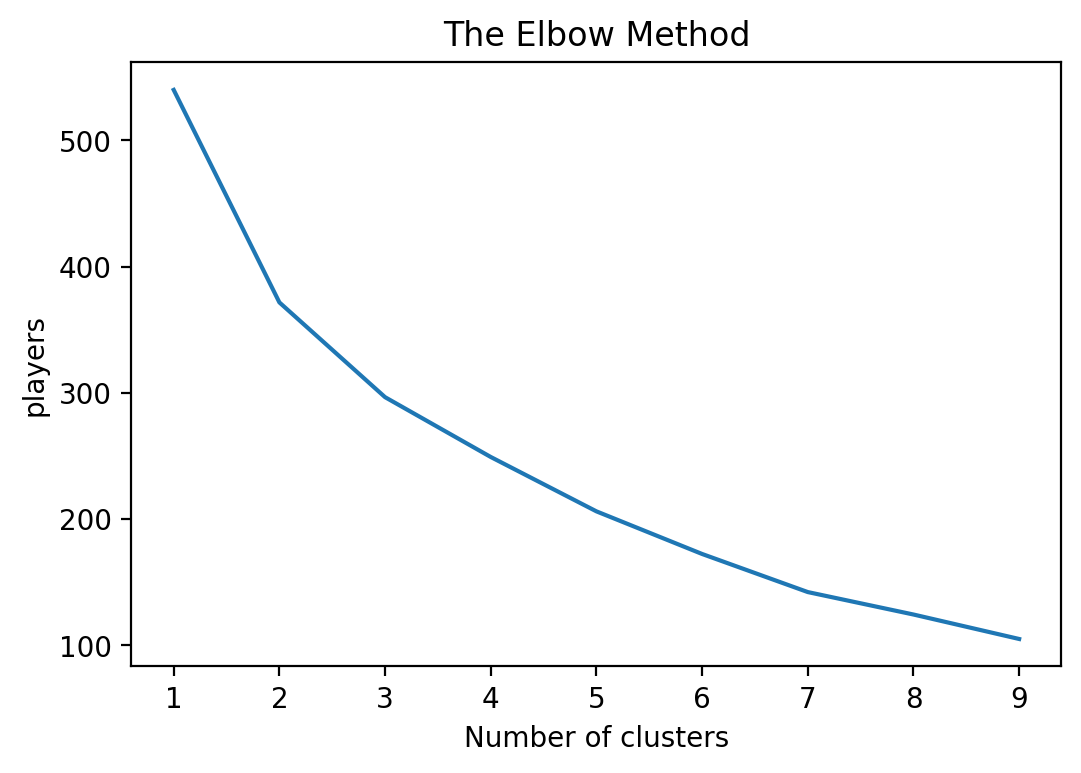

In [26]:
from sklearn.cluster import KMeans
players = []
for i in range(1,10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    players.append(kmeans.inertia_)
plt.plot(range(1, 10), players)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('players')
plt.show()

In [27]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)


In [28]:
y_kmeans

array([1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 2, 2, 2, 2, 1, 1, 2, 0, 1])

In [29]:
kmeans.cluster_centers_

array([[ 0.71026542,  0.93651976, -0.01069718,  1.21137005,  1.18133684,
         1.03544631,  1.24463457, -0.20589883,  1.1489978 ,  1.17028877,
         0.30151134,  1.15874669,  0.61663439, -0.50381964,  0.71026542,
        -0.89854539, -0.95121756, -0.71554882, -0.96375705, -0.83709634,
        -0.65033523, -1.13114138, -0.64392519, -0.4662524 , -0.39223227,
         0.8364546 ,  0.53530338],
       [ 0.21397458, -0.11443758,  0.3815326 , -0.47371285, -0.48885119,
        -0.52193261, -0.50498838,  0.06251414, -0.49242763, -0.57165049,
         0.03350126, -0.43720088, -0.19901957, -0.12966247,  0.21397458,
         0.98759043,  1.04242118,  0.80388818,  1.03929892,  0.92878641,
         0.46102046,  0.53550134,  0.51967574,  0.56986405,  0.479395  ,
        -0.16528744, -0.22941573],
       [-1.23747275, -0.91783607, -0.67392207, -0.60096094, -0.53767207,
        -0.30305687, -0.5845824 ,  0.13455314, -0.49242763, -0.37537564,
        -0.42211588, -0.60353445, -0.38172605,  0.8379

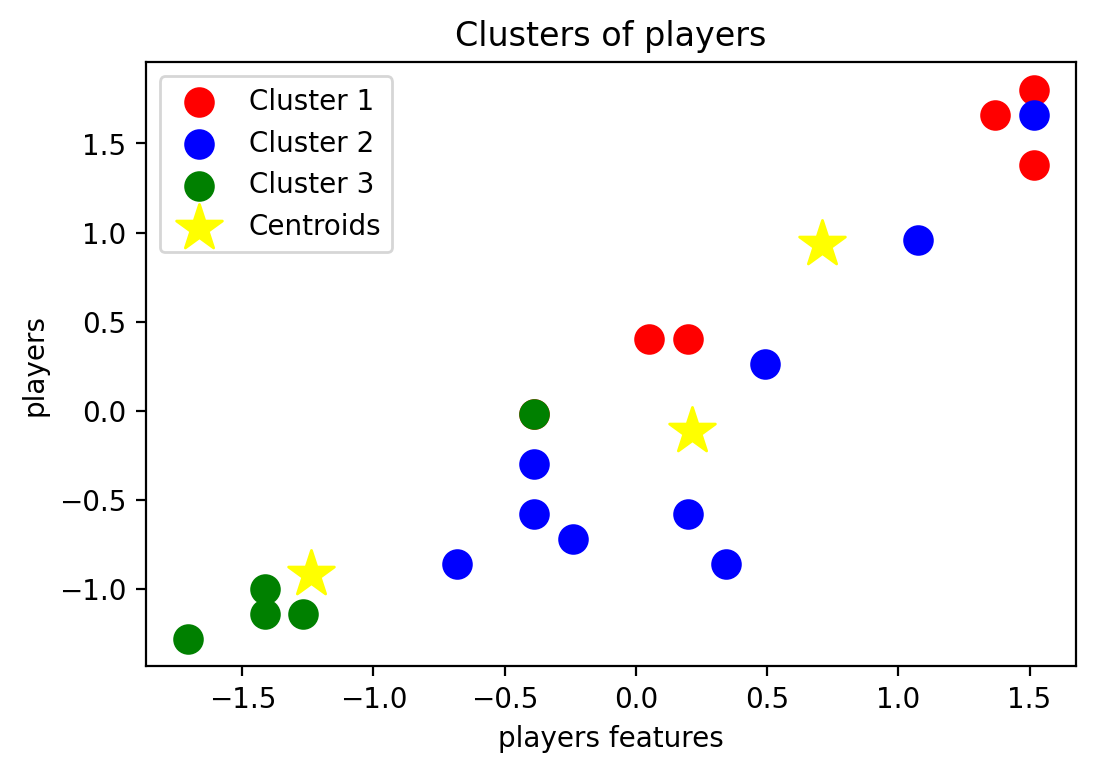

In [30]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300,marker='*', c = 'yellow', label = 'Centroids')
plt.title('Clusters of players')
plt.xlabel('players features')
plt.ylabel('players')
plt.legend()
plt.show()

In [31]:
Australia_2019

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,JP Behrendorff (AUS),11,5,3,19,11*,9.50,15,126.66,0,...,517,16,5/44,32.31,5.24,36.9,0,1,3,0
1,AT Carey (AUS),23,20,6,605,85,43.21,621,97.42,0,...,-,-,-,-,-,-,-,-,29,5
2,NM Coulter-Nile (AUS),10,6,1,132,92,26.40,105,125.71,0,...,544,14,3/53,38.85,5.95,39.1,0,0,0,0
3,PJ Cummins (AUS),16,12,3,68,23*,7.55,82,82.92,0,...,670,31,5/70,21.61,4.73,27.3,1,1,7,0
4,AJ Finch (AUS),23,23,1,1141,153*,51.86,1276,89.42,4,...,102,2,1/13,51.00,5.66,54.0,0,0,13,0
5,PSP Handscomb (AUS),14,13,1,483,117,40.25,500,96.60,1,...,-,-,-,-,-,-,-,-,8,0
6,UT Khawaja (AUS),22,22,0,1085,104,49.31,1278,84.89,2,...,-,-,-,-,-,-,-,-,10,0
7,NM Lyon (AUS),14,6,5,27,12*,27.00,24,112.50,0,...,672,11,2/53,61.09,5.01,73.0,0,0,4,0
8,SE Marsh (AUS),13,13,2,461,131,41.90,556,82.91,1,...,-,-,-,-,-,-,-,-,6,0
9,GJ Maxwell (AUS),23,22,3,635,98,33.42,480,132.29,0,...,681,5,1/16,136.20,5.67,144.0,0,0,15,0


In [32]:
Australia_2019["cluster"] = y_kmeans

In [33]:
Australia_2019

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St,cluster
0,JP Behrendorff (AUS),11,5,3,19,11*,9.50,15,126.66,0,...,16,5/44,32.31,5.24,36.9,0,1,3,0,1
1,AT Carey (AUS),23,20,6,605,85,43.21,621,97.42,0,...,-,-,-,-,-,-,-,29,5,0
2,NM Coulter-Nile (AUS),10,6,1,132,92,26.40,105,125.71,0,...,14,3/53,38.85,5.95,39.1,0,0,0,0,1
3,PJ Cummins (AUS),16,12,3,68,23*,7.55,82,82.92,0,...,31,5/70,21.61,4.73,27.3,1,1,7,0,1
4,AJ Finch (AUS),23,23,1,1141,153*,51.86,1276,89.42,4,...,2,1/13,51.00,5.66,54.0,0,0,13,0,0
5,PSP Handscomb (AUS),14,13,1,483,117,40.25,500,96.60,1,...,-,-,-,-,-,-,-,8,0,0
6,UT Khawaja (AUS),22,22,0,1085,104,49.31,1278,84.89,2,...,-,-,-,-,-,-,-,10,0,0
7,NM Lyon (AUS),14,6,5,27,12*,27.00,24,112.50,0,...,11,2/53,61.09,5.01,73.0,0,0,4,0,1
8,SE Marsh (AUS),13,13,2,461,131,41.90,556,82.91,1,...,-,-,-,-,-,-,-,6,0,0
9,GJ Maxwell (AUS),23,22,3,635,98,33.42,480,132.29,0,...,5,1/16,136.20,5.67,144.0,0,0,15,0,1


In [34]:
Australia_2019['cluster'].value_counts()

1    9
0    6
2    5
Name: cluster, dtype: int64

In [35]:
Australia_Cluster_2019 = np.array([6,9,5])

In [36]:
Australia_Cluster_2019

array([6, 9, 5])

In [37]:
%store Australia_Cluster_2019

Stored 'Australia_Cluster_2019' (ndarray)


In [38]:
Australia_2019_players_scaled.insert(0, 'Player', Australia_2019.Player)

In [39]:
Australia_2019_players_scaled

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
0,JP Behrendorff (AUS),-0.241637,-0.721657,0.738105,-0.844323,-1.034874,-0.911929,-0.823875,0.764849,-0.492428,...,1.510603,0.745335,0.758990,0.064537,0.456274,0.158107,-0.466252,1.568929,-0.465810,-0.229416
1,AT Carey (AUS),1.515721,1.380257,2.663597,0.833443,0.391209,0.719636,0.722086,-0.011537,-0.492428,...,-0.715549,-1.021866,-0.871056,-0.905539,-1.479659,-0.902645,-0.466252,-0.392232,3.440984,4.358899
2,NM Coulter-Nile (AUS),-0.388083,-0.581530,-0.545556,-0.520795,0.526109,-0.093969,-0.594277,0.739624,-0.492428,...,0.874560,0.837626,0.555234,0.260894,0.718586,0.221349,-0.466252,-0.392232,-0.916594,-0.229416
3,PJ Cummins (AUS),0.490596,0.259236,0.738105,-0.704032,-0.803617,-1.006309,-0.652952,-0.396543,-0.492428,...,2.782690,1.268317,2.287158,-0.256720,0.267853,-0.117861,1.398757,1.568929,0.135235,-0.229416
4,AJ Finch (AUS),1.515721,1.800640,-0.545556,2.368055,1.701665,1.138296,2.393051,-0.223954,3.088864,...,-0.715549,-0.673211,-0.667300,0.625686,0.611444,0.649675,-0.466252,-0.392232,1.036803,-0.229416
5,PSP Handscomb (AUS),0.197703,0.399364,-0.545556,0.484147,1.007894,0.576372,0.413404,-0.033310,0.402895,...,-0.715549,-1.021866,-0.871056,-0.905539,-1.479659,-0.902645,-0.466252,-0.392232,0.285496,-0.229416
6,UT Khawaja (AUS),1.369275,1.660513,-1.187387,2.207723,0.757366,1.014876,2.398153,-0.344236,1.298218,...,-0.715549,-1.021866,-0.871056,-0.905539,-1.479659,-0.902645,-0.466252,-0.392232,0.586019,-0.229416
7,NM Lyon (AUS),0.197703,-0.581530,2.021766,-0.821418,-1.015603,-0.064929,-0.800915,0.388870,-0.492428,...,-0.079505,1.275154,0.249601,0.928628,0.371300,1.195861,-0.466252,-0.392232,-0.315549,-0.229416
8,SE Marsh (AUS),0.051256,0.399364,0.096275,0.421159,1.277694,0.656232,0.556265,-0.396809,0.402895,...,-0.715549,-1.021866,-0.871056,-0.905539,-1.479659,-0.902645,-0.466252,-0.392232,-0.015026,-0.229416
9,GJ Maxwell (AUS),1.515721,1.660513,0.738105,0.919336,0.641738,0.245800,0.362382,0.914337,-0.492428,...,-0.079505,1.305917,-0.361666,3.183732,0.615139,3.236874,-0.466252,-0.392232,1.337326,-0.229416


In [40]:
Australia_2019_players_scaled[['Player','Ave_x','Ave_y']]

,Player,Ave_x,Ave_y
0,JP Behrendorff (AUS),-0.911929,0.064537
1,AT Carey (AUS),0.719636,-0.905539
2,NM Coulter-Nile (AUS),-0.093969,0.260894
3,PJ Cummins (AUS),-1.006309,-0.256720
4,AJ Finch (AUS),1.138296,0.625686
5,PSP Handscomb (AUS),0.576372,-0.905539
6,UT Khawaja (AUS),1.014876,-0.905539
7,NM Lyon (AUS),-0.064929,0.928628
8,SE Marsh (AUS),0.656232,-0.905539
9,GJ Maxwell (AUS),0.245800,3.183732


In [41]:
Australia_2019_Ave=Australia_2019_players_scaled.mean()

In [42]:
Australia_2019_Ave

Mat_x          -2.220446e-17
Inns_x         -2.775558e-17
NO             -3.330669e-17
Runs_x          4.996004e-17
HS             -6.661338e-17
Ave_x           1.887379e-16
BF              5.551115e-18
SR_x           -6.661338e-17
100             1.665335e-17
50              4.996004e-17
0              -1.110223e-17
4s              5.551115e-18
6s             -1.110223e-17
Unnamed: 0_y   -1.554312e-16
Mat_y          -2.220446e-17
Inns_y          2.220446e-17
Overs           5.551115e-17
Mdns            4.857226e-18
Runs_y          3.330669e-17
Wkts           -6.661338e-17
Ave_y          -5.412337e-17
Econ           -2.720046e-16
SR_y            2.220446e-17
4              -1.110223e-17
5              -1.665335e-17
Ct              3.885781e-17
St              4.163336e-17
dtype: float64

In [43]:
Australia_Ave_2019 =Australia_2019_Ave[['Ave_x','Ave_y']]

In [44]:
Australia_Ave_2019

Ave_x    1.887379e-16
Ave_y   -5.412337e-17
dtype: float64

In [45]:
Australia_Ave_2019 = np.array([Australia_Ave_2019.Ave_x, Australia_Ave_2019.Ave_y])

In [46]:
Australia_Ave_2019

array([ 1.88737914e-16, -5.41233725e-17])

In [47]:
%store Australia_Ave_2019

Stored 'Australia_Ave_2019' (ndarray)


In [48]:
Australia_2019

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St,cluster
0,JP Behrendorff (AUS),11,5,3,19,11*,9.50,15,126.66,0,...,16,5/44,32.31,5.24,36.9,0,1,3,0,1
1,AT Carey (AUS),23,20,6,605,85,43.21,621,97.42,0,...,-,-,-,-,-,-,-,29,5,0
2,NM Coulter-Nile (AUS),10,6,1,132,92,26.40,105,125.71,0,...,14,3/53,38.85,5.95,39.1,0,0,0,0,1
3,PJ Cummins (AUS),16,12,3,68,23*,7.55,82,82.92,0,...,31,5/70,21.61,4.73,27.3,1,1,7,0,1
4,AJ Finch (AUS),23,23,1,1141,153*,51.86,1276,89.42,4,...,2,1/13,51.00,5.66,54.0,0,0,13,0,0
5,PSP Handscomb (AUS),14,13,1,483,117,40.25,500,96.60,1,...,-,-,-,-,-,-,-,8,0,0
6,UT Khawaja (AUS),22,22,0,1085,104,49.31,1278,84.89,2,...,-,-,-,-,-,-,-,10,0,0
7,NM Lyon (AUS),14,6,5,27,12*,27.00,24,112.50,0,...,11,2/53,61.09,5.01,73.0,0,0,4,0,1
8,SE Marsh (AUS),13,13,2,461,131,41.90,556,82.91,1,...,-,-,-,-,-,-,-,6,0,0
9,GJ Maxwell (AUS),23,22,3,635,98,33.42,480,132.29,0,...,5,1/16,136.20,5.67,144.0,0,0,15,0,1
